In [1]:
%matplotlib inline
from imp import reload

import itertools
import numpy as np
import utils; reload(utils)

from utils import *
from __future__ import print_function
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
from IPython.display import Image

/home/konstantin/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
max_features = 20000
embedding_size = 128
lstm_output_size = 128
maxlen = 80
batch_size = 32
epochs = 4

In [4]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [5]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


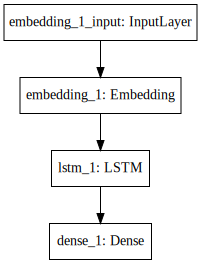

In [6]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, embedding_size))
model.add(LSTM(lstm_output_size, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

plot_model(model, to_file='model.png', show_shapes=True)
Image(filename = 'model.png')

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [7]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 82s 3ms/step - loss: 0.4576 - acc: 0.7841 - val_loss: 0.3917 - val_acc: 0.8298
Epoch 2/4
25000/25000 [==============================] - 78s 3ms/step - loss: 0.2951 - acc: 0.8808 - val_loss: 0.3951 - val_acc: 0.8162
Epoch 3/4
25000/25000 [==============================] - 80s 3ms/step - loss: 0.2160 - acc: 0.9158 - val_loss: 0.4255 - val_acc: 0.8266
Epoch 4/4
25000/25000 [==============================] - 80s 3ms/step - loss: 0.1579 - acc: 0.9405 - val_loss: 0.4974 - val_acc: 0.8288


In [8]:
# Evaluate model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
preds = model.predict_classes(x_test, batch_size=batch_size)

25000/25000 [==============================] - 15s 582us/step


In [9]:
# Save the model weights
model_path = 'models/'
model.save(model_path + 'lstm_model.h5')
model.save_weights(model_path + 'lstm_weights.h5')

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 9973  2527]
 [ 1753 10747]]


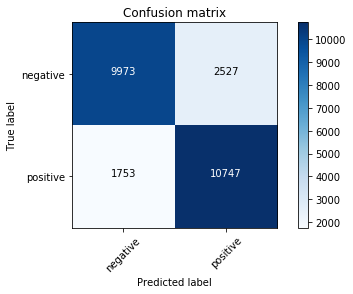

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})

In [12]:
# F1 score
f1_macro = f1_score(y_test, preds, average='macro') 
f1_micro = f1_score(y_test, preds, average='micro')

print('Test accuracy:', acc)
print('Test score (loss):', score)
print('')
print('F1 Score (Macro):', f1_macro)
print('F1 Score (Micro):', f1_micro)

Test accuracy: 0.8288
Test score (loss): 0.4973752626895905

F1 Score (Macro): 0.8286357436588291
F1 Score (Micro): 0.8288
